In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold,StratifiedShuffleSplit, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [2]:
wine = pd.read_csv('winequality-white.csv', delimiter=";")
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


C:\Users\bac.nt172963\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

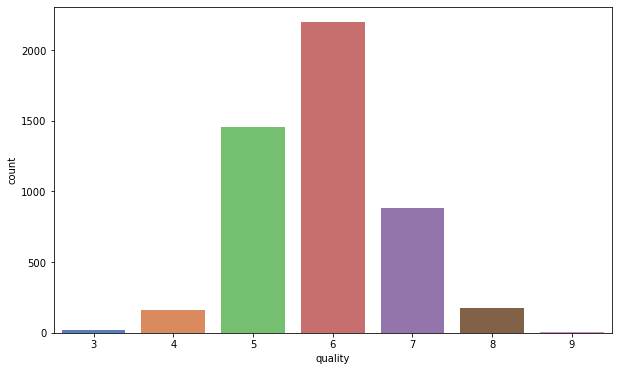

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(wine["quality"], palette="muted")
wine["quality"].value_counts()

[('Bad', 183), ('Medium', 3655), ('Good', 1060)]


C:\Users\bac.nt172963\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

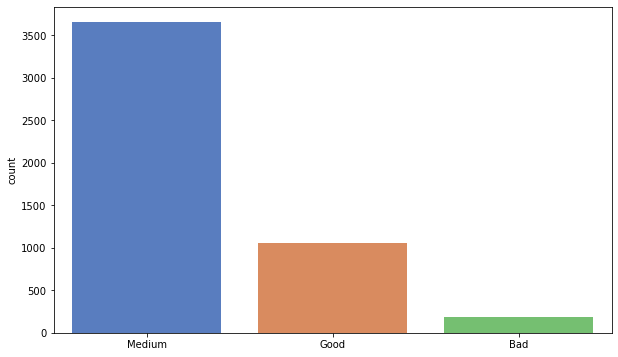

In [5]:
quality = wine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Bad")
    elif num > 6:
        category.append("Good")
    else:
        category.append("Medium")

        
# Count number of wine which is MEDIUM category, BAD category and GOOD catergory
print([(i, category.count(i)) for i in set(category)])

plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

<AxesSubplot:>

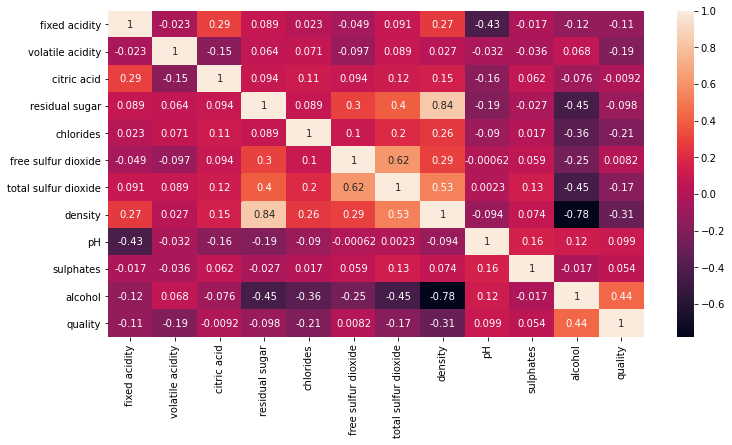

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(wine.corr(), annot=True)

In [7]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([wine, category], axis=1)
data.drop(columns="quality", axis=1, inplace=True)

# X is all vector feature: all rows and all columns except last column
X = data.iloc[:, :-1].values

# y is output: all rows of last columns
y = data.iloc[:, -1].values

labelencode_y = LabelEncoder()
y = labelencode_y.fit_transform(y)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
reg = LinearRegression()


In [8]:
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
result

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, predictions))
print(mean_absolute_error(y_test, predictions))
print(r2_score(y_test, predictions))


0.22244937655752908
0.3816795056139619
0.1284075587138651


In [9]:
# Turn label of output y: "Good" = 1, "Bad" = 0.
labelencode_y = LabelEncoder()
y = labelencode_y.fit_transform(y)

In [10]:
skf = StratifiedShuffleSplit(n_splits=5)

In [11]:
classifier = LinearRegression(fit_intercept=False)
all_accuracies = cross_val_score(
    estimator=classifier, 
    X=X, 
    y=y,
    cv=skf)
print(all_accuracies)

[0.06732465 0.09637375 0.10077054 0.09813684 0.05722216]


In [12]:
classifier = LinearRegression()

classifier.intercept=8.0
all_accuracies = cross_val_score(
    estimator=classifier, 
    X=X, 
    y=y,
    cv=skf)
print(all_accuracies)

[0.09921692 0.10374601 0.07315848 0.05022081 0.0480245 ]


In [13]:
classifier = LinearRegression(fit_intercept=False, positive=True)
all_accuracies = cross_val_score(
    estimator=classifier, 
    X=X, 
    y=y,
    cv=skf)
print(all_accuracies)

[0.05083676 0.0373561  0.04720263 0.01809731 0.00098493]


In [15]:
from sklearn import neighbors

classifier = neighbors.KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')
all_accuracies = cross_val_score(
    estimator=classifier,
    X=X,
    y=y,
    cv=skf)
print(all_accuracies)

[0.74897959 0.76122449 0.7877551  0.76326531 0.78571429]
